In [1]:
# Adding src module to path
import sys
import os
from tqdm import tqdm
module_path = os.path.abspath(os.path.join('../..'))

print(f"module path {module_path}")
if module_path not in sys.path:
    sys.path.append(module_path)


module path C:\Users\overs\Python\Master-Thesis-Project


In [2]:
# general imports
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib notebook

import src.utils as utils
from src.nqs import RBM, IsingHamiltonian, IsingHamiltonianReduced, RandomHamiltonian


## Testing hidden node accuracy

Training several RBMs with increasing number of visible nodes. For each RBM we test how increasing the number of hidden nodes affects accuracy.

In [3]:

#Initializing starting values 
visible_size = 2
seed = 42

#Finding true ground state energy and displaying it
np.random.seed(seed)



energy_4_list = []
energy_8_list = []


time_list =[]
n_hid_list =[]



In [4]:
energy_list=[]
true_energy_list=[]
time_list = []

for v in [4,5,6]:
    
            
    np.random.seed(seed)

    gamma = gamma = utils.random_gamma(v)
    rh = RandomHamiltonian
    ih = IsingHamiltonian(gamma=gamma)
    ihr = IsingHamiltonianReduced(gamma=gamma)
    
    eig,_ = np.linalg.eigh(ih)
    E_truth = np.min(eig)
    true_energy_list.append(E_truth)

    
    energies=[]
    times = []
    
    for i in tqdm(range(1,5)): 
        visible_size = v
        hidden_size = i
        
        np.random.seed(seed)

        rbm = RBM(visible_size=visible_size, hidden_size=hidden_size, hamiltonian=ihr, walker_steps=1000)
        
        energies.append(rbm.train(iterations=1000, lr=0.01, print_energy=False))
        time_list.append(rbm.train.run_time)
        
    
        # Print loop    
    
    
    energy_list.append(energies)
    time_list.append(times)



 25%|████████████████████▊                                                              | 1/4 [04:46<14:19, 286.57s/it]

func:train args:[(<src.nqs.RBM object at 0x000001D5308A8580>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 286.5640649795532 sec


 50%|█████████████████████████████████████████▌                                         | 2/4 [10:17<10:24, 312.44s/it]

func:train args:[(<src.nqs.RBM object at 0x000001D5308A8760>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 330.54492807388306 sec


 75%|██████████████████████████████████████████████████████████████▎                    | 3/4 [15:58<05:25, 325.45s/it]

func:train args:[(<src.nqs.RBM object at 0x000001D5308A85E0>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 340.9386751651764 sec


100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [21:41<00:00, 325.34s/it]


func:train args:[(<src.nqs.RBM object at 0x000001D5308A8610>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 343.2970585823059 sec


 25%|████████████████████▊                                                              | 1/4 [04:52<14:38, 292.91s/it]

func:train args:[(<src.nqs.RBM object at 0x000001D5308A82E0>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 292.914359331131 sec


 50%|█████████████████████████████████████████▌                                         | 2/4 [11:20<11:37, 348.87s/it]

func:train args:[(<src.nqs.RBM object at 0x000001D5308A88B0>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 388.045560836792 sec


 75%|██████████████████████████████████████████████████████████████▎                    | 3/4 [18:04<06:13, 373.68s/it]

func:train args:[(<src.nqs.RBM object at 0x000001D5308A8610>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 403.2073481082916 sec


100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [24:47<00:00, 371.94s/it]


func:train args:[(<src.nqs.RBM object at 0x000001D5308A8A60>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 403.5734589099884 sec


 25%|████████████████████▊                                                              | 1/4 [05:10<15:30, 310.23s/it]

func:train args:[(<src.nqs.RBM object at 0x000001D5308A88B0>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 310.2291510105133 sec


 50%|█████████████████████████████████████████▌                                         | 2/4 [12:07<12:26, 373.09s/it]

func:train args:[(<src.nqs.RBM object at 0x000001D5301D1E80>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 417.08345556259155 sec


 75%|██████████████████████████████████████████████████████████████▎                    | 3/4 [19:21<06:41, 401.21s/it]

func:train args:[(<src.nqs.RBM object at 0x000001D5308A8EB0>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 434.67795991897583 sec


100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [26:42<00:00, 400.51s/it]

func:train args:[(<src.nqs.RBM object at 0x000001D5301D12E0>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 440.05754566192627 sec


<IPython.core.display.Javascript object>


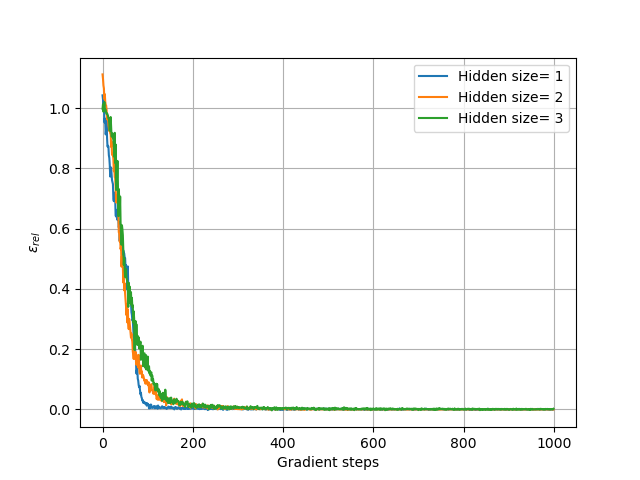

In [37]:

labels = [f"Hidden size= {i}" for i in range(1,5)]



plt.figure(0)

for energy in energy_list[0][0:3]:
    plt.plot((energy-true_energy_list[0])/np.abs(true_energy_list[0]))
    


plt.xlabel("Gradient steps")
plt.ylabel(r'$\epsilon_{rel}$')
plt.grid()
plt.legend(labels)








In [1]:
# Save figure as pdf
username = os.getlogin()
desktop_path = f"{os.path.expanduser(os.getenv('USERPROFILE'))}\\Desktop"

date_format = '%Y.%m.%d:%H%M'

path = f"{desktop_path}"

plt.savefig(f"{path}/HiddenIpact4V_new.pdf")

NameError: name 'os' is not defined

<IPython.core.display.Javascript object>


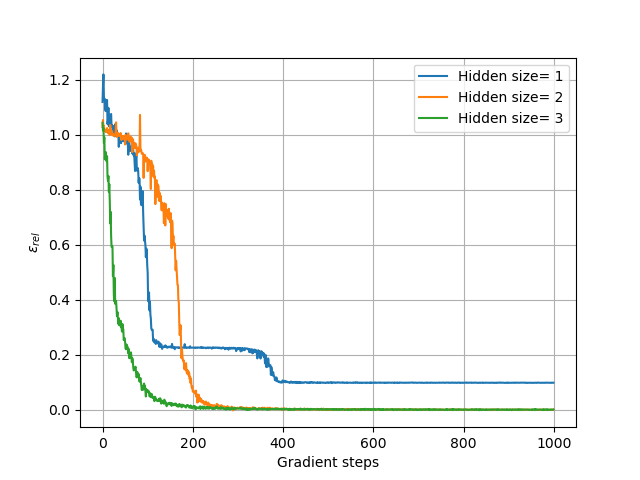

In [39]:
plt.figure(1)
for energy in energy_list[1][0:3]:
    plt.plot((energy-true_energy_list[1])/np.abs(true_energy_list[1]))

    
plt.xlabel("Gradient steps")
plt.ylabel(r'$\epsilon_{rel}$')
plt.legend(labels)
plt.grid()



In [40]:
# Save figure as pdf
username = os.getlogin()
desktop_path = f"{os.path.expanduser(os.getenv('USERPROFILE'))}\\Desktop"

date_format = '%Y.%m.%d:%H%M'

path = f"{desktop_path}"

plt.savefig(f"{path}/HiddenIpact5V.pdf")

<IPython.core.display.Javascript object>


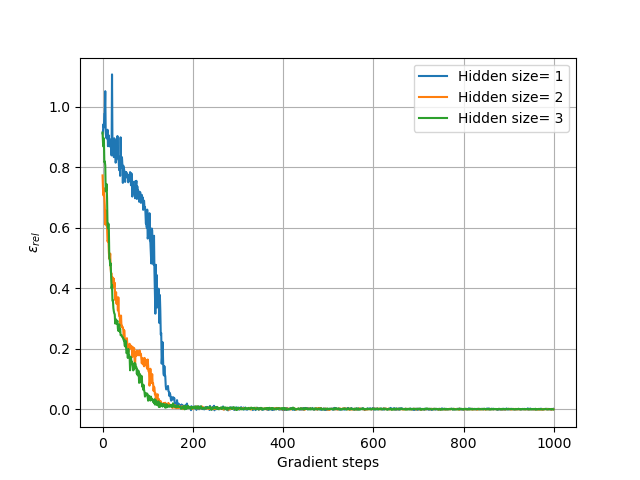

In [41]:

plt.figure(2) 
for energy in energy_list[2][0:3]:
    plt.plot((energy-true_energy_list[2])/np.abs(true_energy_list[2]))


plt.xlabel("Gradient steps")
plt.ylabel(r'$\epsilon_{rel}$')
plt.legend(labels)
plt.grid()


In [43]:

# Save figure as pdf
username = os.getlogin()
desktop_path = f"{os.path.expanduser(os.getenv('USERPROFILE'))}\\Desktop"

date_format = '%Y.%m.%d:%H%M'

path = f"{desktop_path}"

plt.savefig(f"{path}/HiddenImpact6V.pdf")